In [1]:
%matplotlib notebook
# %matplotlib inline

# %connect_info
import flow.misc
text = """
Jupyter connect hash:
{word}

To connect to current notebook:
    $> jupyter console --existing {filename}
    
"""
print(text.format(word=flow.misc.notebook_word(), filename=flow.misc.notebook_file(flow.misc.notebook_word())))
print("Last run: {}".format(flow.misc.timestamp()))


Jupyter connect hash:
fraud

To connect to current notebook:
    $> jupyter console --existing kernel-a9c94ca4-5c5d-4480-a964-474c4399076a.json
    

Last run: 2018-10-30-21h41m34s


/usr/local/lib/python2.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='darkgrid')
# sns.set(context='talk', style='darkgrid')

import flow
import pool
import jzap

In [3]:
db = pool.database.db()
colors = pool.config.colors()
colors['plus_ensure'] = sns.xkcd_rgb['forest green']
colors['vdrive_plus_30_ensure'] = sns.xkcd_rgb['forest green']
colors['vdrive_plus_30'] = colors['plus']
colors['vdrive_plus'] = colors['plus']
colors['vdrive_plus_ensure'] = sns.xkcd_rgb['forest green']

## Responses over time

In [89]:
mice = ['OA205']
label_list = []
skip_few_runs = True
for mouse_name in mice:
    mouse = flow.metadata.Mouse(mouse_name)
    for date in mouse.dates():
        if skip_few_runs and len(date.runs(['training'])) < 2:
            continue
        glm = date.glm()
        if not glm:
            continue
        lick = glm.labels()['lick']
        nolick = np.invert(lick)
        plus = glm.labels()['plus'] & nolick
        neutral = glm.labels()['neutral'] & nolick
        minus = glm.labels()['minus'] & nolick
        ensure = glm.labels()['ensure'] & nolick
        quinine = glm.labels()['quinine'] & nolick
        vdrive_plus = db.get('vdrive_plus', date.mouse, date.date)
        vdrive_neutral = db.get('vdrive_neutral', date.mouse, date.date)
        vdrive_minus = db.get('vdrive_minus', date.mouse, date.date)
        dprime = db.get('behavior_dprime_orig', date.mouse, date.date)
        label_list.append({'mouse': date.mouse,
                           'date': date.date,
                           'Date': str(date.date),
                           'plus': plus.sum() / float(len(plus)),
                           'neutral': neutral.sum() / float(len(neutral)),
                           'minus': minus.sum() / float(len(minus)),
                           'ensure': ensure.sum() / float(len(ensure)),
                           'quinine': quinine.sum() / float(len(quinine)),
                           'vdrive_plus': ((vdrive_plus > 50) & nolick).sum() / float(len(vdrive_plus)),
                           'Plus': ((vdrive_plus > 30) & nolick).sum() / float(len(vdrive_plus)),
                           'vdrive_neutral': ((vdrive_neutral > 50) & nolick).sum() / float(len(vdrive_neutral)),
                           'Neutral': ((vdrive_neutral > 30) & nolick).sum() / float(len(vdrive_neutral)),
                           'vdrive_minus': ((vdrive_minus > 50) & nolick).sum() / float(len(vdrive_minus)),
                           'Minus': ((vdrive_minus > 30) & nolick).sum() / float(len(vdrive_minus)),
                           'plus_ensure': (plus & ensure).sum() / float(len(ensure)),
                           'vdrive_plus_ensure': ((vdrive_plus > 50) & ensure & nolick).sum() / float(len(ensure)),
                           'vdrive_plus_30_ensure': ((vdrive_plus > 30) & ensure & nolick).sum() / float(len(ensure)),
                           'dprime': dprime,
        })
label_df = pd.DataFrame(label_list)
label_df['reverse'] = label_df.date.apply(lambda x: 'pre' if x < flow.metadata.reversal(mouse.mouse) else 'post')
label_df_long = label_df.melt(id_vars=['mouse', 'date', 'Date', 'reverse', 'dprime'], value_name='Fraction of cells', var_name='Component')

<IPython.core.display.Javascript object>


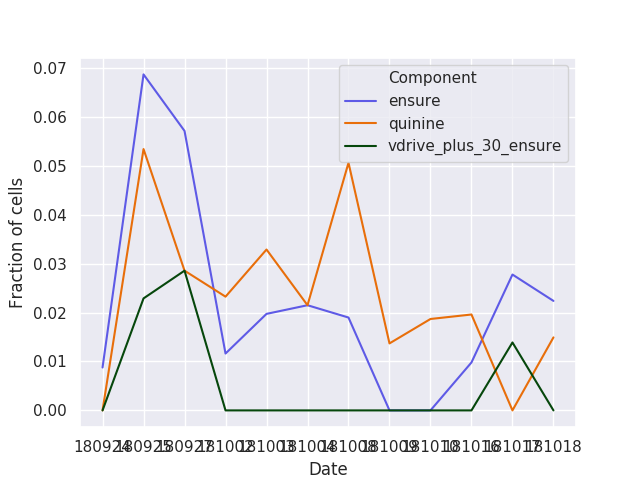

In [90]:
tmp_df = label_df_long[label_df_long.Component.isin(['vdrive_plus_30', 'ensure', 'vdrive_plus_30_ensure', 'quinine'])]

plt.figure()
sns.lineplot('Date', 'Fraction of cells', data=tmp_df, hue='Component', palette=colors)

<IPython.core.display.Javascript object>


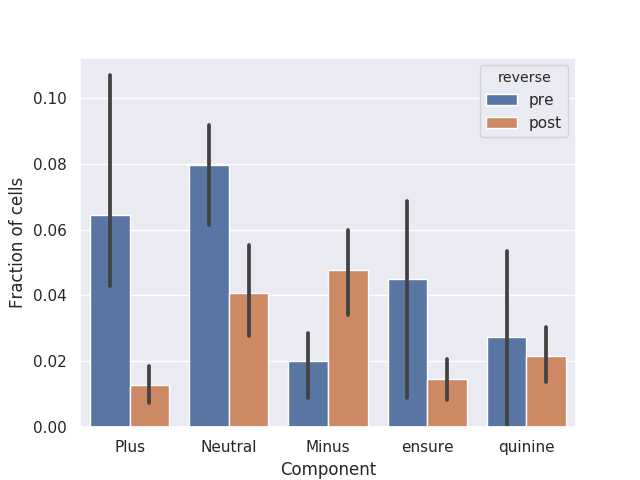

In [92]:
plt.figure()
stims = ['Plus', 'Neutral', 'Minus', 'ensure', 'quinine']
sns.barplot('Component', 'Fraction of cells', 'reverse', data=label_df_long[label_df_long.Component.isin(stims)], order=stims)

<IPython.core.display.Javascript object>


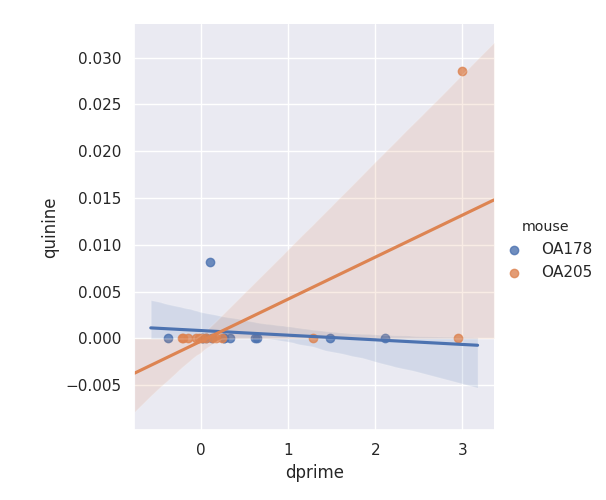

In [15]:
sns.lmplot('dprime', 'quinine', hue='mouse', data=label_df)

## Devexp of each component

In [79]:
mouse = flow.metadata.Mouse('OA205')
devexp_list = []
for date in mouse.dates():
    glm = date.glm()
    if not glm:
        continue
    devexp = glm.explained()
    total = devexp['total']
    lick = devexp['lick'] / total
    quinine = devexp['quinine'] / total
    ensure = devexp['ensure'] / total
    plus = devexp['plus'] / total
    neutral = devexp['neutral'] / total
    minus = devexp['minus'] / total
    visual = devexp['plus'] + devexp['neutral'] + devexp['minus']
    devexp_list.append(pd.DataFrame({'mouse': date.mouse, 
                        'date': date.date,
                        'Date': str(date.date),
                        'lick': lick,
                        'ensure': ensure,
                        'quinine': quinine,
                        'visual': visual,
                        'plus': plus,
                        'neutral': neutral,
                        'minus': minus}))
devexp_df = pd.concat(devexp_list, ignore_index=True)
devexp_df['reverse'] = devexp_df.date.apply(lambda x: 'pre' if x < flow.metadata.reversal(mouse.mouse) else 'post')
devexp_df_long = devexp_df.melt(id_vars=['mouse', 'date', 'Date', 'reverse'], value_name='Fraction deviance explained', var_name='Component')

  if __name__ == '__main__':

  # Remove the CWD from sys.path while we load stuff.

  # This is added back by InteractiveShellApp.init_path()

  if sys.path[0] == '':

  del sys.path[0]

  



<IPython.core.display.Javascript object>


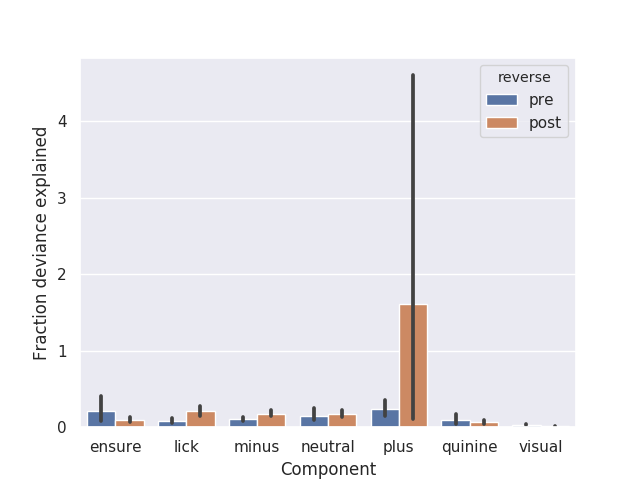

In [80]:
plt.figure()
sns.barplot('Component', 'Fraction deviance explained', 'reverse', data=devexp_df_long)

In [74]:
glm.devexp.shape

(134, 7)

In [76]:
glm.cellgroups

['plus', 'neutral', 'minus', 'lick', 'ensure', 'quinine']

In [84]:
label_df_long.head()

,mouse,date,Date,reverse,Component,Fraction of cells
0,OA205,180924,180924,pre,ensure,0.052632
1,OA205,180925,180925,pre,ensure,0.122137
2,OA205,180926,180926,pre,ensure,0.173228
3,OA205,180927,180927,pre,ensure,0.171429
4,OA205,181001,181001,post,ensure,0.000000


In [99]:
tmp_df.head()

,mouse,date,Date,reverse,Component,Fraction of cells
0,OA205,180924,180924,pre,ensure,0.052632
1,OA205,180925,180925,pre,ensure,0.122137
2,OA205,180926,180926,pre,ensure,0.173228
3,OA205,180927,180927,pre,ensure,0.171429
4,OA205,181001,181001,post,ensure,0.000000


In [111]:
glm.labels()['plus'] & np.invert(glm.labels()['lick'])

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,

In [114]:
vdrive_plus

array([ 0.95709989,  1.24983422,  2.37377626,  8.11202781,  0.19713342,
        0.86196703,  7.02784822,  1.60037321, 12.60127243,  1.2991098 ,
        0.        , 18.53393005,  0.79917348,  0.        ,  0.88327003,
        0.35871958,  0.        ,  5.94142539,  0.        ,  4.4854926 ,
        0.        , 42.31395464,  0.9925957 ,  2.7082891 ,  2.13960474,
        1.07884214,  0.        ,  1.86413569, 29.00683486,  3.19697328,
        0.        ,  0.        ,  7.02784822,  0.        ,  0.        ,
        7.13939168,  3.02729882,  7.44506523,  0.        ,  5.87028179,
        8.47489749,  4.3887666 ,  0.31661872, 25.69448184,  1.42055636,
        0.        ,  7.61772965, 19.27435361,  1.9402378 , 17.46910704,
        7.79242985,  0.        ,  5.24004201, 15.97518542,  0.        ,
       23.80192648, 17.46910704, 10.65868811,  3.89621183,  0.28501261,
       13.10171246,  3.21943679, 30.05492512,  1.66603162,  2.64653418,
        0.        ,  9.9285945 ,  0.60933635,  8.42604227,  5.50

In [122]:
label_df.head()

,Date,date,ensure,minus,mouse,neutral,plus,plus_ensure,vdrive_plus,vdrive_plus_30,vdrive_plus_30_ensure,vdrive_plus_ensure,reverse
0,180924,180924,0.008772,0.035088,OA205,0.052632,0.035088,0.008772,0.017544,0.043860,0.000000,0.000000,pre
1,180925,180925,0.068702,0.091603,OA205,0.114504,0.145038,0.053435,0.061069,0.106870,0.022901,0.015267,pre
2,180927,180927,0.057143,0.057143,OA205,0.071429,0.042857,0.028571,0.028571,0.042857,0.028571,0.014286,pre
3,181002,181002,0.011628,0.058140,OA205,0.081395,0.058140,0.011628,0.011628,0.011628,0.000000,0.000000,post
4,181003,181003,0.019737,0.052632,OA205,0.065789,0.032895,0.013158,0.006579,0.019737,0.000000,0.000000,post


## Find some example cells

In [64]:
mouse = flow.metadata.Mouse('OA205')
all_cell_list = []
skip_few_runs = True
for date in mouse.dates():
    if skip_few_runs and len(date.runs(['training'])) < 2:
        continue
    glm = date.glm()
    if not glm:
        continue
    lick = glm.labels()['lick']
    plus_label = glm.labels()['plus']
    neutral_label = glm.labels()['neutral']
    minus_label = glm.labels()['minus']
    ensure_label = glm.labels()['ensure']
    quinine_label = glm.labels()['quinine']
    vdrive_plus = db.get('vdrive_plus', date.mouse, date.date)
    vdrive_plus[lick] = np.nan
    vdrive_plus[vdrive_plus < 30] = np.nan
    
    plus = glm.explained()['plus']
    plus[np.invert(plus_label) | lick] = np.nan
    neutral = glm.explained()['neutral']
    neutral[np.invert(neutral_label) | lick] = np.nan
    minus = glm.explained()['minus']
    minus[np.invert(minus_label) | lick] = np.nan
    ensure = glm.explained()['ensure']
    ensure[np.invert(ensure_label) | lick] = np.nan
    quinine = glm.explained()['quinine']
    quinine[np.invert(quinine_label) | lick] = np.nan
    
    all_cell_list.append(pd.DataFrame({
        'mouse': date.mouse,
        'date': date.date,
        'roi': np.arange(len(plus)),
        'plus': plus,
        'neutral': neutral,
        'minus': minus,
        'ensure': ensure,
        'quinine': quinine,
        'vdrive_plus_30': vdrive_plus
    }))
all_cell_df = pd.concat(all_cell_list, ignore_index=True)

In [81]:
all_cell_df.sort_values(by='ensure', ascending=False)

,date,ensure,minus,mouse,neutral,plus,quinine,roi,vdrive_plus_30
242,180925,0.108142,0.045607,OA205,0.056740,0.226967,0.059650,128,66.650035
422,181003,0.106746,0.100867,OA205,0.067290,0.105879,0.104071,21,NaN
123,180925,0.070140,0.013319,OA205,0.017730,0.191294,NaN,9,56.254476
203,180925,0.019312,0.007682,OA205,0.027119,0.029779,0.008678,89,NaN
1070,181016,0.017549,0.077187,OA205,0.018612,0.017713,0.018333,13,NaN
298,180927,0.016262,0.015042,OA205,0.011544,NaN,0.018381,53,NaN
1184,181017,0.016223,0.008463,OA205,0.006233,0.015896,NaN,25,30.355383
634,181004,0.012946,0.006897,OA205,NaN,0.023540,NaN,81,NaN
623,181004,0.012841,NaN,OA205,0.006640,0.041494,NaN,70,NaN
309,180927,0.012725,0.031432,OA205,NaN,0.037759,NaN,64,74.345911


<IPython.core.display.Javascript object>


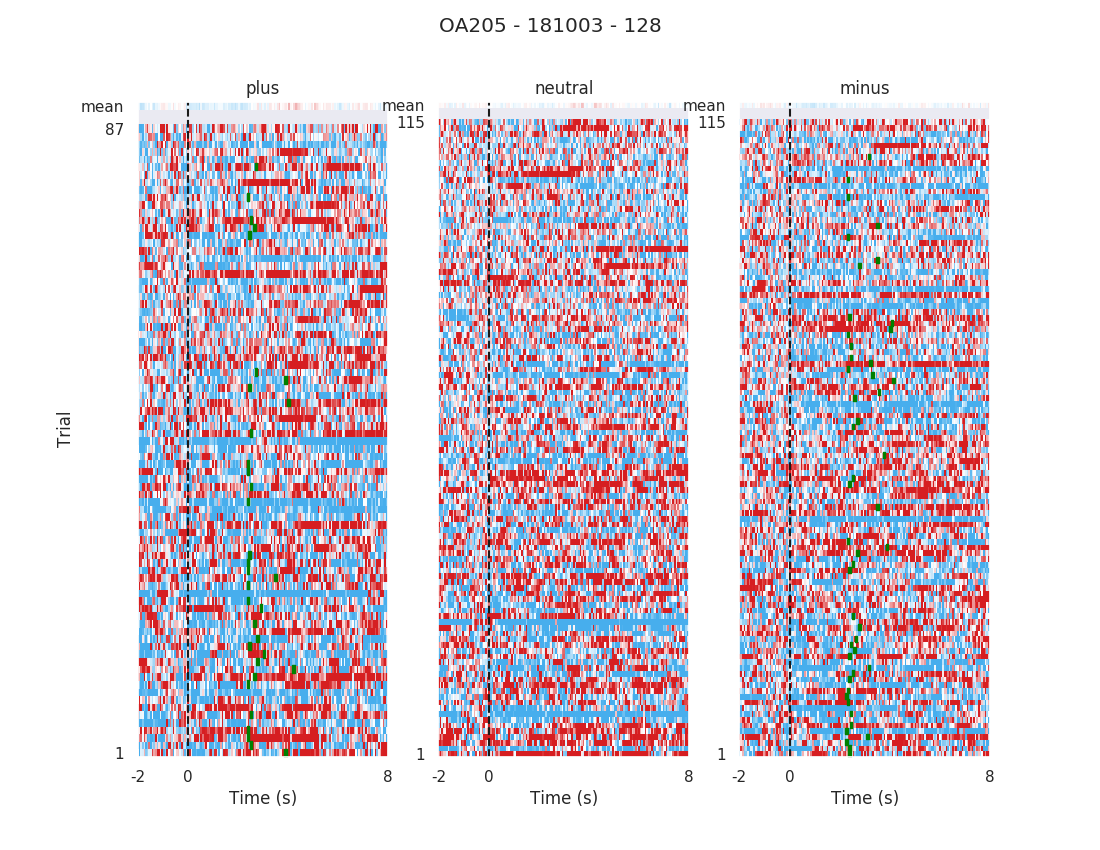

<IPython.core.display.Javascript object>


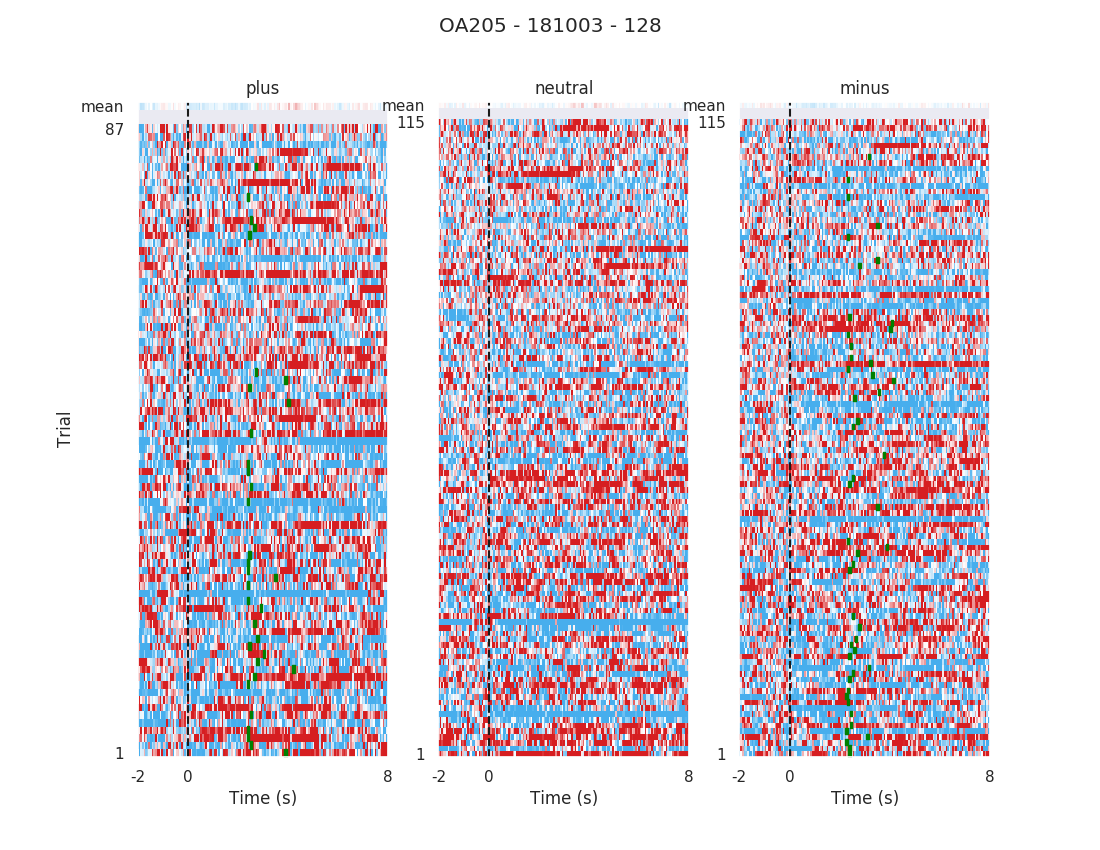

In [77]:
pool.layouts.stimulus.trial_responses(
    flow.metadata.Date(mouse='OA205', date=181003), 128, (-2, 8), mode='heatmap', baseline=(-1, 0),
    fig_kw={'figsize': (11,8.5)})

In [144]:
t2p=date.runs()[1].trace2p()

In [145]:
t2p.outcomes('plus')

array([-1, -1, -1, 56, 46, 48, -1, -1, 38, 37, -1, 38, 36, 48, 40, 47, -1,
       -1, 38, 53, -1, -1, -1, 65, -1, -1, -1, 48, -1, -1, 40, -1, 54, -1,
       -1, 42, -1, 38, -1, -1, -1, -1])

In [146]:
t2p.outcomes('minus')

array([-1, 54, 41, -1, 44, 50, 51, 41, -1, -1, 63, 60, -1, 41, -1, -1, -1,
       38, 35, 39, -1, 64, -1, -1, -1, -1, 35, -1, -1, 52, -1, -1, 45, -1,
       -1, -1, 36, 62, -1, -1, 43, -1, 45, 45, -1, -1, 35, 36, -1, -1, 46,
       35, -1, -1])

In [152]:
t2p.ensure().shape

(180,)

In [156]:
t2p.csoffsets('plus')

array([ 1491,  1652,  2818,  3121,  3426,  3862,  4322,  4778,  5584,
        5732,  6354,  6978,  8687, 10353, 10645, 11208, 11687, 11849,
       12172, 12643, 13262, 13585, 14501, 15116, 16458, 16619, 16781,
       17417, 18029, 19674, 20136, 21490, 21652, 22594, 22917, 23646,
       24766, 25666, 25814, 27164, 27326, 27487], dtype=int32)

In [160]:
all_cell_df.sort_values?

In [166]:
glm.cellgroups

['plus', 'neutral', 'minus', 'lick', 'ensure', 'quinine']